In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import functions as fun

In [2]:
#mods = fun.models()
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .2
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .15
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .3
mpl.rcParams['figure.figsize']        = 7,6


rcp45
bcc-csm1-1 & 15 & 16 &  1 & -2 &  3 & 33 \\
CanESM2 & 20 & 18 &  3 & -4 &  6 & 43 \\
CCSM4 & 18 & 16 & -1 & -3 & 12 & 42 \\
CNRM-CM5 & 13 & 16 &  2 & -4 & 12 & 39 \\
CSIRO-Mk3-6-0 & 20 & 11 &  3 & -4 &  5 & 34 \\
GFDL-CM3 & 26 & 22 &  8 & -2 &  7 & 60 \\
GISS-E2-R & 22 & 12 &  1 & -2 &  8 & 42 \\
HadGEM2-ES & 17 & 21 &  5 & -4 &  6 & 45 \\
inmcm4 & 15 &  8 &  1 & -3 & 10 & 31 \\
IPSL-CM5A-LR & 17 & 17 &  4 & -2 &  7 & 43 \\
MIROC-ESM & 23 & 19 &  6 & -4 &  4 & 49 \\
MIROC5 & 19 & 17 &  5 & -2 &  7 & 46 \\
MRI-CGCM3 & 13 & 10 &  0 & -3 &  5 & 27 \\
NorESM1-M & 19 & 16 &  2 & -2 & 10 & 45 \\
\hline
\hline
Variance $\sigma^2$ (cm$^2$) & 12 & 15 &  6 &  1 &  7 & 66 & 25


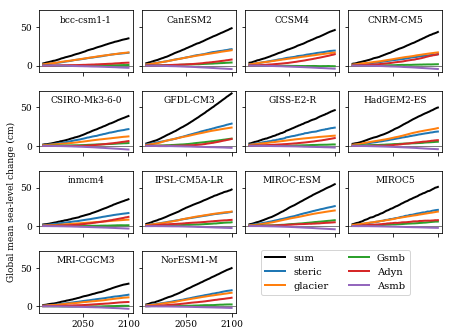

rcp85
bcc-csm1-1 & 24 & 19 &  3 & -4 &  3 & 46 \\
CanESM2 & 29 & 23 &  9 & -6 & 11 & 66 \\
CCSM4 & 28 & 21 &  1 & -6 & 14 & 58 \\
CNRM-CM5 & 20 & 20 &  3 & -6 & 16 & 54 \\
CSIRO-Mk3-6-0 & 28 & 15 &  5 & -5 &  6 & 48 \\
GFDL-CM3 & 36 & 25 & 14 & -3 & 12 & 84 \\
GISS-E2-R & 28 & 15 &  3 & -3 & 11 & 54 \\
HadGEM2-ES & 26 & 26 &  7 & -6 & 12 & 65 \\
inmcm4 & 23 & 10 &  1 & -4 & 11 & 43 \\
IPSL-CM5A-LR & 27 & 22 &  8 & -4 &  7 & 60 \\
MIROC-ESM & 34 & 23 & 13 & -5 &  6 & 70 \\
MIROC5 & 28 & 23 &  8 & -3 & 11 & 66 \\
MRI-CGCM3 & 21 & 16 &  2 & -4 &  9 & 44 \\
NorESM1-M & 28 & 20 &  4 & -3 & 11 & 60 \\
\hline
\hline
Variance $\sigma^2$ (cm$^2$) & 17 & 18 & 15 &  1 & 11 & 123 & 61


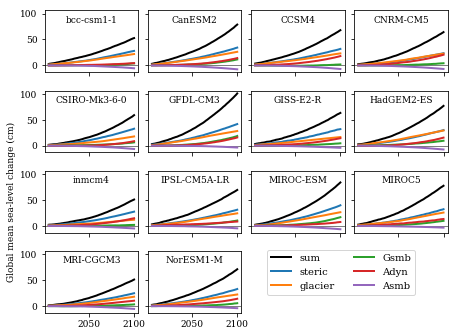

In [12]:
for scen in ['rcp45','rcp85']:
    fig,ax = plt.subplots(4,4,sharex=True,sharey=True)
    vstdn = np.array([])
    vglac = np.array([])
    vgsmb = np.array([])
    vasmb = np.array([])
    vadyn = np.array([])
    vslr = np.array([])
    
    print(scen)
    for m,model in enumerate(mods):
        if m>12-1:
            dax = ax[3,m-12]
        elif m>8-1:
            dax = ax[2,m-8]
        elif m>4-1:
            dax = ax[1,m-4]
        else:
            dax = ax[0,m]

        with xr.open_dataset(f'../data/Adyn/{model}_{scen}.nc') as ds:
            adyn = ds['SLR'].values
            time = ds['time'].values
        with xr.open_dataset(f'../data/Asmb/{model}_{scen}.nc') as ds:
            asmb = ds['SLR'].values
        with xr.open_dataset(f'../data/Gsmb/{model}_{scen}.nc') as ds:
            gsmb = ds['SLR'].values
        with xr.open_dataset(f'../data/steric/{model}_{scen}.nc') as ds:
            stdn = ds['SLR'].values        
        with xr.open_dataset(f'../data/glacier/{model}_{scen}.nc') as ds:
            glac = ds['SLR'].values   
        slr = adyn+asmb+gsmb+stdn+glac

        dax.axhline(0,0,1,color='k',lw=.5)
        dax.plot(time,slr,color='k',label='sum')
        dax.plot(time,stdn,label='steric')
        dax.plot(time,glac,label='glacier')
        dax.plot(time,gsmb,label='Gsmb')
        dax.plot(time,adyn,label='Adyn')
        dax.plot(time,asmb,label='Asmb')  
        dax.set_title(model,pad=-12)
        
        with xr.open_dataset(f'../data/gmst/{model}_{scen}.nc') as ds:
            gmst = ds['TA'].values
        
        vstdn = np.append(vstdn,np.nanmean(stdn[-20:]))
        vglac = np.append(vglac,np.nanmean(glac[-20:]))
        vgsmb = np.append(vgsmb,np.nanmean(gsmb[-20:]))
        vasmb = np.append(vasmb,np.nanmean(asmb[-20:]))
        vadyn = np.append(vadyn,np.nanmean(adyn[-20:]))
        vslr  = np.append(vslr,np.nanmean(slr[-20:]))
        
        #print(model,f'& {np.nanmean(stdn[-20:]):2.0f} & {np.nanmean(glac[-20:]):2.0f} & {np.nanmean(gsmb[-20:]):2.0f} & {np.nanmean(asmb[-20:]):2.0f} & {np.nanmean(adyn[-20:]):2.0f} & {np.nanmean(slr[-20:]):2.0f} & {np.nanmean(gmst[-20:]):2.1f}',r'\\')
        print(model,f'& {np.nanmean(stdn[-20:]):2.0f} & {np.nanmean(glac[-20:]):2.0f} & {np.nanmean(gsmb[-20:]):2.0f} & {np.nanmean(asmb[-20:]):2.0f} & {np.nanmean(adyn[-20:]):2.0f} & {np.nanmean(slr[-20:]):2.0f}',r'\\')
    print(r'\hline')
    print(r'\hline')
    res = np.nanvar(vslr)-np.nanvar(vstdn)-np.nanvar(vglac)-np.nanvar(vgsmb)-np.nanvar(vasmb)-np.nanvar(vadyn)
    print(f'Variance (cm$^2$) & {np.nanvar(vstdn):2.0f} & {np.nanvar(vglac):2.0f} & {np.nanvar(vgsmb):2.0f} & {np.nanvar(vasmb):2.0f} & {np.nanvar(vadyn):2.0f} & {np.nanvar(vslr):2.0f} & {res:2.0f}')
        
    ax[2,0].set_ylabel(f'Global mean sea-level change (cm)')
#    ax[3,1].set_xlabel('Year')
    ax[3,2].set_visible(False)
    ax[3,3].set_visible(False)
    ax[3,1].legend(bbox_to_anchor=(1.22, 1.1),ncol=2)

    figname = f'draftplot_ts_components_{scen}.pdf'

    plt.savefig(f'../figures/{figname}',dpi=200)
    plt.savefig(f'../../../writing/codependence/figures/{figname}')
    plt.show()
    plt.close()